<a href="https://colab.research.google.com/github/2203A52082/DAUP_PROJECT_2203A52082/blob/main/DAUP_PROJECT(IMAGE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from scipy import stats
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Define dataset path
dataset_zip = "/content/Celebrity Faces Dataset.zip"
train_dir = "/content/Celebrity Faces Dataset"

# Check if the dataset is zipped and extract it
if not os.path.exists(train_dir):
    if os.path.exists(dataset_zip):
        print("Extracting dataset...")
        with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
            zip_ref.extractall("/content/")
    else:
        raise FileNotFoundError(f"Dataset not found at {dataset_zip}")

# Check again if the extracted folder exists
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Extracted dataset folder not found at {train_dir}")

# Define parameters
img_size = (128, 128)
batch_size = 16

# Load the entire dataset (using the whole dataset for training and evaluation)
dataset = image_dataset_from_directory(train_dir, image_size=img_size, batch_size=batch_size, label_mode='int')

# Extract class names
class_names = sorted(os.listdir(train_dir))
num_classes = len(class_names)

# Normalize images
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

dataset = dataset.map(preprocess).cache().prefetch(tf.data.AUTOTUNE)

# Load pre-trained MobileNetV2 model
base_model = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False


Extracting dataset...
Found 1800 files belonging to 17 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Build CNN model
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
model.fit(dataset, epochs=epochs)

# Evaluate the model on the dataset
loss, accuracy = model.evaluate(dataset)
print(f"Accuracy on the entire dataset: {accuracy:.2f}")


Epoch 1/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 342ms/step - accuracy: 0.1505 - loss: 2.7402
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 27s 239ms/step - accuracy: 0.3986 - loss: 1.8081
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 33s 168ms/step - accuracy: 0.5117 - loss: 1.4531
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 182ms/step - accuracy: 0.5977 - loss: 1.2282
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 19s 167ms/step - accuracy: 0.6719 - loss: 0.9943
113/113 ━━━━━━━━━━━━━━━━━━━━ 22s 169ms/step - accuracy: 0.8460 - loss: 0.6511
Accuracy on the entire dataset: 0.85


In [ ]:
# Extract model predictions
true_labels = []
predicted_labels = []
predicted_probs = []  # To store probability scores for ROC curve
for images, labels in dataset:
    preds = model.predict(images)
    predicted_labels.extend(np.argmax(preds, axis=1))
    predicted_probs.extend(preds)  # Collect predicted probabilities
    true_labels.extend(labels.numpy())

# Convert to NumPy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)
predicted_probs = np.array(predicted_probs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

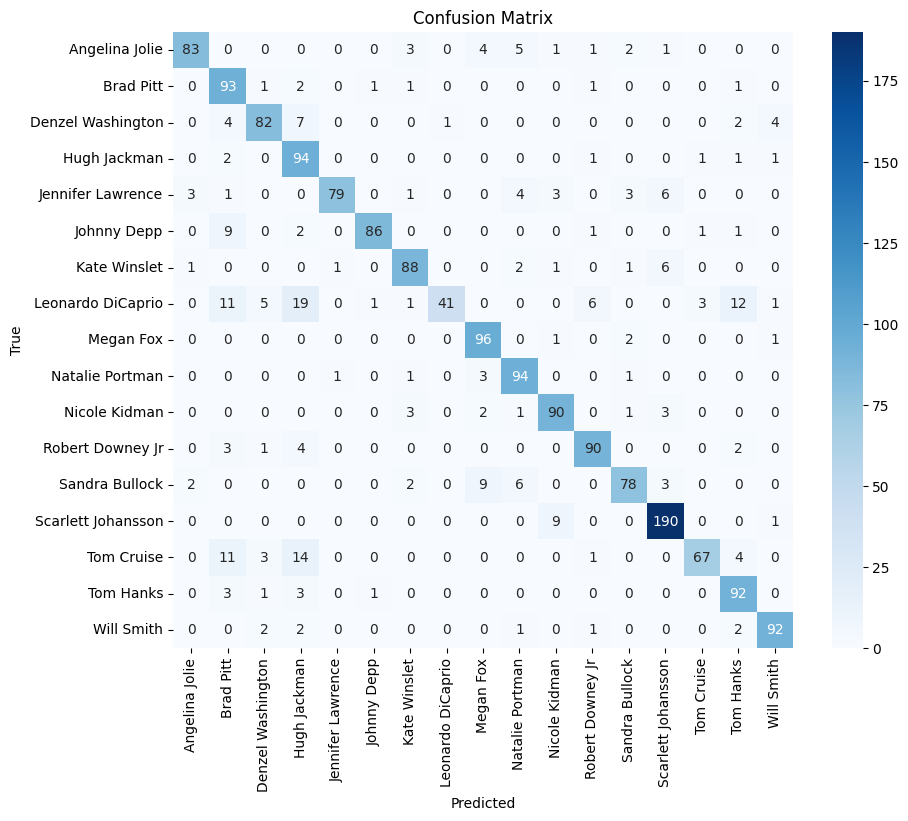

In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_names))


Classification Report:
                    precision    recall  f1-score   support

    Angelina Jolie       0.93      0.83      0.88       100
         Brad Pitt       0.68      0.93      0.78       100
 Denzel Washington       0.86      0.82      0.84       100
      Hugh Jackman       0.64      0.94      0.76       100
 Jennifer Lawrence       0.98      0.79      0.87       100
       Johnny Depp       0.97      0.86      0.91       100
      Kate Winslet       0.88      0.88      0.88       100
 Leonardo DiCaprio       0.98      0.41      0.58       100
         Megan Fox       0.84      0.96      0.90       100
   Natalie Portman       0.83      0.94      0.88       100
     Nicole Kidman       0.86      0.90      0.88       100
  Robert Downey Jr       0.88      0.90      0.89       100
    Sandra Bullock       0.89      0.78      0.83       100
Scarlett Johansson       0.91      0.95      0.93       200
        Tom Cruise       0.93      0.67      0.78       100
         Tom Han

In [ ]:
# Z-Test
z_stat, z_p_value = stats.ttest_1samp(predicted_labels - true_labels, 0)
print(f"Z-Test: Z={z_stat:.2f}, p-value={z_p_value:.4f}")


Z-Test: Z=-1.91, p-value=0.0560


In [ ]:
# T-Test
t_stat, t_p_value = stats.ttest_rel(predicted_labels, true_labels)
print(f"T-Test: T={t_stat:.2f}, p-value={t_p_value:.4f}")


T-Test: T=-1.91, p-value=0.0560


In [ ]:
# ANOVA Test
anova_stat, anova_p_value = stats.f_oneway(predicted_labels, true_labels)
print(f"ANOVA Test: F={anova_stat:.2f}, p-value={anova_p_value:.4f}")


ANOVA Test: F=0.61, p-value=0.4343


In [ ]:
# Type 1 & Type 2 Errors
false_positives = np.sum((predicted_labels != true_labels) & (true_labels == 0))
false_negatives = np.sum((predicted_labels != true_labels) & (true_labels == 1))
total_samples = len(true_labels)

type1_error_rate = false_positives / total_samples
type2_error_rate = false_negatives / total_samples

print(f"Type 1 Error Rate: {type1_error_rate:.2f}")
print(f"Type 2 Error Rate: {type2_error_rate:.2f}")


Type 1 Error Rate: 0.01
Type 2 Error Rate: 0.00


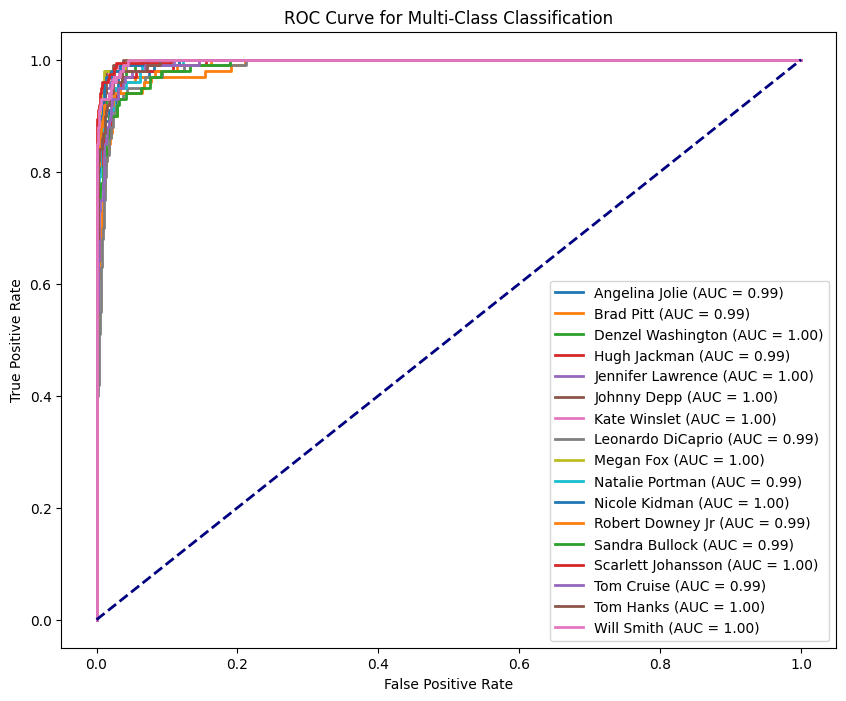

In [ ]:
# ROC Curve (One-vs-Rest for Multi-Class)
# Binarize the labels for multi-class ROC curve
true_labels_bin = label_binarize(true_labels, classes=np.arange(num_classes))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(true_labels_bin[:, i], predicted_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

# Plot ROC curve (Random Classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()


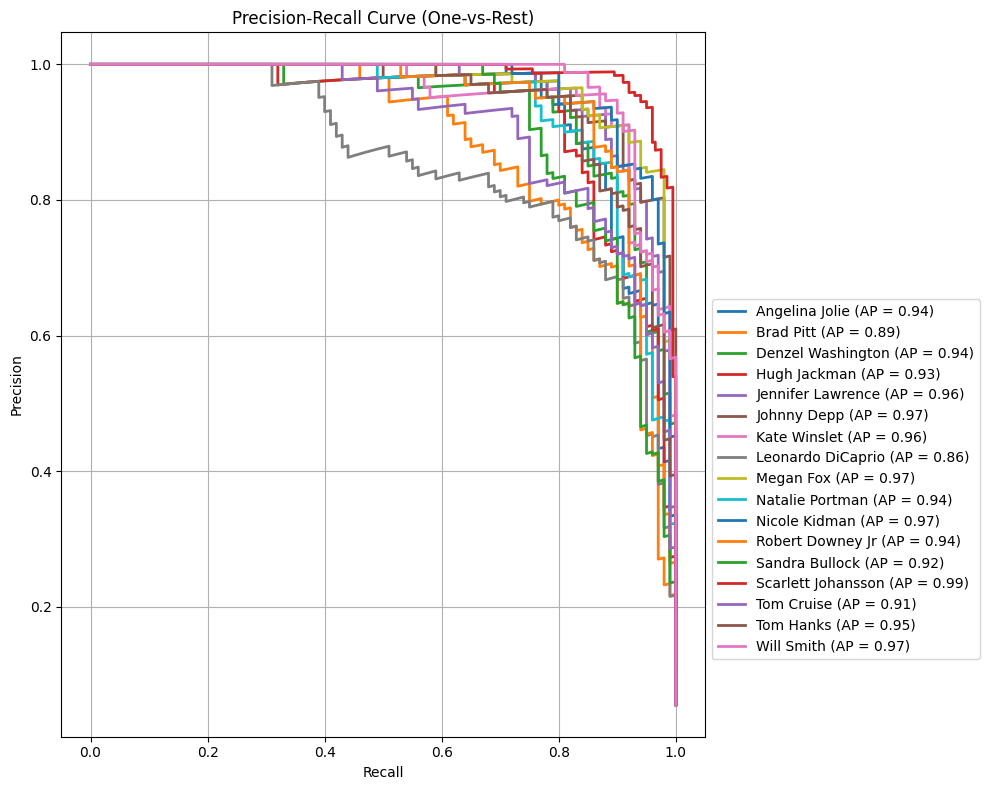

In [ ]:
# Precision-Recall Curve
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(true_labels_bin[:, i], predicted_probs[:, i])
    avg_precision = average_precision_score(true_labels_bin[:, i], predicted_probs[:, i])
    plt.plot(recall, precision, lw=2, label=f'{class_names[i]} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (One-vs-Rest)')
plt.legend(loc="lower left", bbox_to_anchor=(1.0, 0.1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Mean Average Precision
mean_ap = average_precision_score(true_labels_bin, predicted_probs, average="macro")
print(f"Mean Average Precision (mAP): {mean_ap:.2f}")


Mean Average Precision (mAP): 0.94
